In [74]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [75]:
%matplotlib inline
import pandas
from pandas import read_csv
import os
import matplotlib.pyplot as plt
import copy
import seaborn as sns

# df1 = read_csv("Info_NoLight_out03_inflow05_queue0.1_range100.csv")
df1 = read_csv("infoResult20190507_queue55_range100_queuemidle.csv")
communication_range = 100

In [76]:
df1
df2 = df1.replace(-1.000000,0)
df = df2.replace(100000,0)

In [77]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
time = df["time"]
queue = df["queue length n"]
Qout = df["outflow"]
Qin = df["inflow"]
AtoB_last_st = df["AtoB last st"]
AtoB_last_ut = df["AtoB last ut"]
AtoB_lead_st = df["AtoB Lead st"]
AtoB_lead_ut = df["AtoB Lead ut"]
AtoB_TT = df["AtoBTT"]
AtoB_EF = df["AtoBEF"]
AtoB_Speed = df["AtoBSpeed"]

BtoA_last_st = df["BtoA last st"]
BtoA_last_ut = df["BtoA last ut"]
BtoA_lead_st = df["BtoA Lead st"]
BtoA_lead_ut = df["BtoA Lead ut"]
BtoA_TT = df["BtoATT"]
BtoA_EF = df["BtoAEF"]
BtoA_Speed = df["BtoASpeed"]

AtoC_last_st = df["AtoC last st"]
AtoC_last_ut = df["AtoC last ut"]
AtoC_lead_st = df["AtoC Lead st"]
AtoC_lead_ut = df["AtoC Lead ut"]
AtoC_TT = df["AtoCTT"]
AtoC_EF = df["AtoCEF"]
AtoC_Speed = df["AtoCSpeed"]
PA = copy.deepcopy(df["AtoCEF"])

BtoC_last_st = df["BtoC last st"]
BtoC_last_ut = df["BtoC last ut"]
BtoC_lead_st = df["BtoC Lead st"]
BtoC_lead_ut = df["BtoC Lead ut"]
BtoC_TT = df["BtoCTT"]
BtoC_EF = df["BtoCEF"]
BtoC_Speed = df["BtoCSpeed"]
PB = copy.deepcopy(df["BtoCEF"])

CtoCright_last_st = df["CtoCright last st"]
CtoCright_last_ut = df["CtoCright last ut"]
CtoCright_lead_st = df["CtoCright Lead st"]
CtoCright_lead_ut = df["CtoCright Lead ut"]
CtoCright_TT = df["CtoCrightTT"]
CtoCright_EF = df["CtoCrightEF"]
CtoCright_Speed = df["CtoCrightSpeed"]

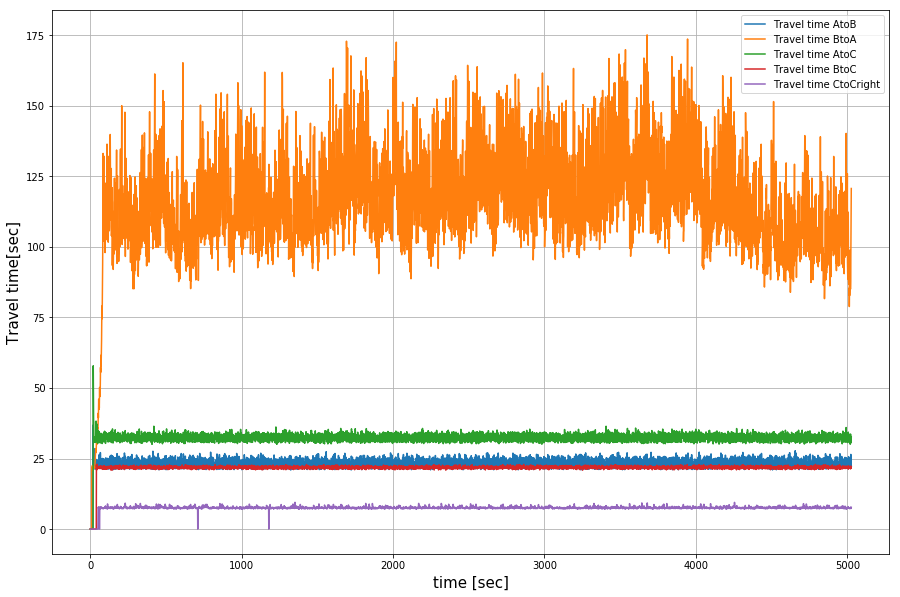

<Figure size 2000x2000 with 0 Axes>

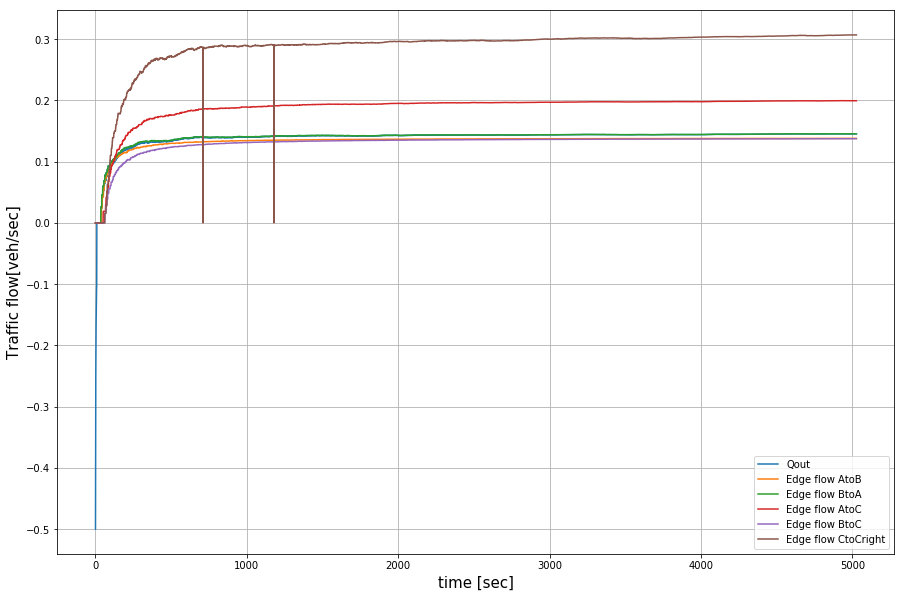

<Figure size 2000x2000 with 0 Axes>

In [78]:
plt.plot(time, AtoB_TT, label = "Travel time AtoB", linestyle='solid')
plt.plot(time, BtoA_TT, label = "Travel time BtoA", linestyle='solid')
plt.plot(time, AtoC_TT, label = "Travel time AtoC", linestyle='solid')
plt.plot(time, BtoC_TT, label = "Travel time BtoC", linestyle='solid')
plt.plot(time, CtoCright_TT, label = "Travel time CtoCright", linestyle='solid')
plt.ylabel("Travel time[sec]",fontsize = 15)
plt.xlabel("time [sec]", fontsize = 15)
# plt.xlim(4000, 4400)
plt.grid()
plt.legend()
plt.figure(figsize=(10,10), dpi=200)
plt.show()

plt.plot(time, Qout, label = "Qout", linestyle='solid')
plt.plot(time, AtoB_EF, label = "Edge flow AtoB", linestyle='solid')
plt.plot(time, BtoA_EF, label = "Edge flow BtoA", linestyle='solid')
plt.plot(time, AtoC_EF, label = "Edge flow AtoC", linestyle='solid')
plt.plot(time, BtoC_EF, label = "Edge flow BtoC", linestyle='solid')
plt.plot(time, CtoCright_EF, label = "Edge flow CtoCright", linestyle='solid')
plt.ylabel("Traffic flow[veh/sec]",fontsize = 15)
plt.xlabel("time [sec]", fontsize = 15)
plt.grid()
plt.legend()
plt.figure(figsize=(10,10), dpi=200)
plt.show()

In [79]:
AtoB_TT_mean = AtoB_TT.where(AtoB_TT>100000, AtoB_TT.mean())
AtoB_EF_last = AtoB_EF.where(AtoB_EF>100000, AtoB_EF[4000])

BtoA_TT_mean = BtoA_TT.where(BtoA_TT>100000, BtoA_TT.mean())
BtoA_EF_last = BtoA_EF.where(BtoA_EF>100000, BtoA_EF[4000])

AtoC_TT_mean = AtoC_TT.where(AtoC_TT>100000, AtoC_TT.mean())
AtoC_EF_last = AtoC_EF.where(AtoC_EF>100000, AtoC_EF[4000])

BtoC_TT_mean = BtoC_TT.where(BtoC_TT>100000, BtoC_TT.mean())
BtoC_EF_last = BtoC_EF.where(BtoC_EF>100000, BtoC_EF[4000])

CtoCright_TT_mean = CtoCright_TT.where(CtoCright_TT>100000, CtoCright_TT.mean())
CtoCright_EF_last = CtoCright_EF.where(CtoCright_EF>100000, CtoCright_EF[4000])

queue_mean = queue.where(queue >10000, queue.mean())
# queue_mean = queue.where(queue >10000, 3.5)
Qout_last = Qout.where(Qout>100000, Qout[4000])

In [80]:
# Mathmatical analysis
import math
# oneseries = CtoCright_EF.replace
NodeA_n = queue_mean
Lower_NodeC_in_fromA_temp = queue_mean - Qout_last * AtoC_TT_mean
Lower_NodeC_in_fromA = Lower_NodeC_in_fromA_temp.where(Lower_NodeC_in_fromA_temp > 0.000 , 0)
Upper_NodeC_in_fromA = queue_mean + (Qin - Qout_last) * AtoC_TT_mean

Lower_NodeB_temp = queue_mean - Qout_last * AtoB_TT_mean
Lower_NodeB = Lower_NodeB_temp.where(Lower_NodeB_temp > 0.000 , 0)
Upper_NodeB = queue_mean + (Qin - Qout_last) * AtoB_TT_mean

Lower_NodeC_in_fromB_temp = queue_mean - Qout_last * (AtoC_TT_mean + AtoB_TT_mean)
Lower_NodeC_in_fromB = Lower_NodeC_in_fromB_temp.where(Lower_NodeC_in_fromB_temp > 0.000 , 0)
Upper_NodeC_in_fromB = queue_mean + (Qin - Qout_last) * (AtoC_TT_mean + AtoB_TT_mean)
Lower_NodeC = copy.deepcopy(df["BtoCEF"])
Upper_NodeC = copy.deepcopy(df["BtoCEF"])

A_vmean = AtoC_Speed.mean()
B_vmean = BtoC_Speed.mean()
Adelta = 2*communication_range / A_vmean
Bdelta = 2*communication_range / B_vmean
# u = E(u) = p p min{uout,uout}+p (1−p )uout +(1−p )p uout +(1−p )(1−p )×uˆ 
for i in range(len(AtoC_EF)):
    PAtemp = 1-math.exp(-Adelta*AtoC_EF_last[i])
    PBtemp = 1-math.exp(-Bdelta*BtoC_EF_last[i])
    PA[i] = PAtemp
    PB[i] = PBtemp
    Lower_NodeC_temp = (PAtemp*PBtemp*max(Lower_NodeC_in_fromA[i], Lower_NodeC_in_fromB[i]) + PAtemp*(1-PBtemp)*Lower_NodeC_in_fromA[i] + (1-PAtemp)*PBtemp*Lower_NodeC_in_fromB[i]) / (1-(1-PAtemp)*(1-PBtemp))
    if (Lower_NodeC_temp < 0):
        Lower_NodeC_temp = 0
    Upper_NodeC_temp = (PAtemp*PBtemp*min(Upper_NodeC_in_fromA[i], Upper_NodeC_in_fromB[i]) + PAtemp*(1-PBtemp)*Upper_NodeC_in_fromA[i] + (1-PAtemp)*PBtemp*Upper_NodeC_in_fromB[i]) / (1-(1-PAtemp)*(1-PBtemp))
    Lower_NodeC[i] = Lower_NodeC_temp
    Upper_NodeC[i] = Upper_NodeC_temp

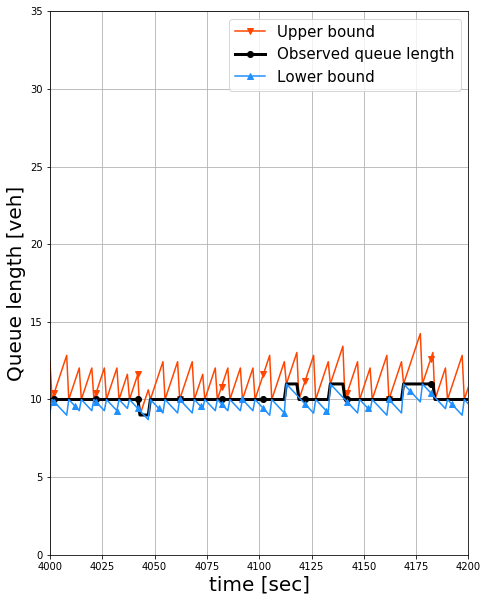

<Figure size 1000x1000 with 0 Axes>

In [81]:
# plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['figure.figsize'] = (7.5, 10.0)
truecolor = 'black'
lowcolor = 'dodgerblue'
uppcolor = 'orangered'
mathlow = 'purple'
mathupp = 'gold'
linewid = 5

# plt.plot(time, queue, label = "True", color=truecolor,  linestyle='solid')
# plt.plot(time, BtoA_lead_st, label = "lower", color=lowcolor,  linestyle='solid', marker='o',markevery = 10,)
# plt.plot(time, BtoA_lead_ut, label = "Upper", color=uppcolor,  linestyle='solid', marker='x',markevery = 10, )
# # plt.plot(time, NodeA_n, label = "Mathmatical")
# plt.xlabel("time [sec]", fontsize = 20)
# plt.ylabel("Queue length [veh]",fontsize = 20)
# plt.grid()
# plt.legend(fontsize = 20)
# plt.title("NodeA (From B to A)")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()

# plt.plot(time, queue, label = "True", color=truecolor,  linestyle='solid')
# # plt.plot(time, BtoA_lead_st, label = "lower", color=lowcolor,  linestyle='solid', marker='o',markevery = 10,)
# # plt.plot(time, BtoA_lead_ut, label = "Upper", color=uppcolor,  linestyle='solid', marker='x',markevery = 10, )
# plt.plot(time, BtoA_lead_st, label = "lower", color=lowcolor,  linestyle='solid', marker='o',)
# plt.plot(time, BtoA_lead_ut, label = "Upper", color=uppcolor,  linestyle='solid', marker='x', )
# # plt.plot(time, NodeA_n, label = "Mathmatical")
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.xlim(4000, 4400)
# plt.grid()
# plt.legend(fontsize = 20)
# plt.title("NodeA (From B to A)")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()

# # plt.plot(time, queue, label = "True", color=truecolor)
# # plt.plot(time, AtoB_last_st, label = "lower",color=lowcolor)
# # plt.plot(time, AtoB_last_ut, label = "Upper", color=uppcolor)
# # plt.xlabel("time [sec]", fontsize = 15)
# # plt.ylabel("Queue length [veh]",fontsize = 15)
# # plt.grid()
# # plt.legend(fontsize = 20)
# # plt.title("NodeA (From A to B)")
# # plt.figure(figsize=(10,10), dpi=200)
# # plt.show()


# # plt.plot(time, queue, label = "True", color=truecolor)
# plt.plot(time, AtoC_last_st, label = "lower", color=lowcolor)
# plt.plot(time, AtoC_last_ut, label = "Upper", color=uppcolor)
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.grid()
# plt.legend(fontsize = 20)
# plt.title("NodeA (From A to C)")
# plt.figure(figsize=(10,10), dpi=100)
# plt.show()

# true_mark = "."
true_mark = 'o'
markan = 20
stmark = "^"
utmark = "v"

plt.plot(time, AtoC_last_ut, label = "Upper bound", color=uppcolor,linestyle='solid', marker=utmark ,markevery = 20)
plt.plot(time, queue, label = "Observed queue length", color=truecolor,linestyle='solid', marker=true_mark,markevery = 20,linewidth=3)
plt.plot(time, AtoC_last_st, label = "Lower bound", color=lowcolor,linestyle='solid', marker=stmark,markevery = 10)
plt.xlabel("time [sec]", fontsize = 20)
plt.ylabel("Queue length [veh]",fontsize = 20)
plt.xlim(4000, 4200)
plt.ylim(0, 35)
plt.grid()
plt.legend(fontsize = 15,loc='upper right')
# plt.title("NodeA (From A to C)")
plt.figure(figsize=(10,10), dpi=100)
plt.show()

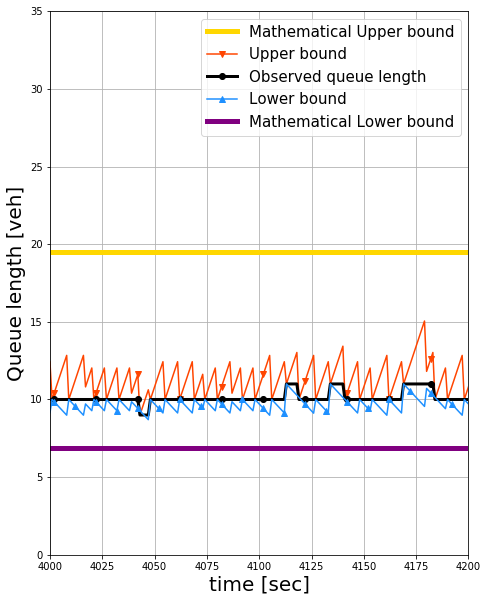

<Figure size 1000x1000 with 0 Axes>

In [82]:
# # plt.plot(time, queue, label = "True", color=truecolor)
# # plt.plot(time, BtoA_last_st, label = "lower", color=lowcolor)
# # plt.plot(time, BtoA_last_ut, label = "Upper", color=uppcolor)
# # plt.xlabel("time [sec]", fontsize = 15)
# # plt.ylabel("Queue length [veh]",fontsize = 15)
# # plt.grid()
# # plt.legend()
# # plt.title("NodeB (From B to A)")
# # plt.figure(figsize=(10,10), dpi=200)
# # plt.show()

# plt.plot(time, queue, label = "True", color=truecolor)
# plt.plot(time, AtoB_lead_st, label = "lower", color=lowcolor)
# plt.plot(time, AtoB_lead_ut, label = "Upper", color=uppcolor)
# plt.plot(time, Lower_NodeB, label = "Math_lower", color=mathlow, linewidth = linewid)
# plt.plot(time, Upper_NodeB, label = "Math_Upper", color=mathupp, linewidth = linewid)
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.grid()
# plt.legend()
# plt.title("NodeB (From A to B)")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()

# plt.plot(time, queue, label = "True", color=truecolor)
# plt.plot(time, AtoB_lead_st, label = "lower", color=lowcolor)
# plt.plot(time, AtoB_lead_ut, label = "Upper", color=uppcolor)
# plt.plot(time, Lower_NodeB, label = "Math_lower",color=mathlow, linewidth = linewid)
# plt.plot(time, Upper_NodeB, label = "Math_Upper",color=mathupp, linewidth = linewid)
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.xlim(4000, 4400)
# plt.grid()
# plt.legend()
# plt.title("NodeB (From A to B)")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()

# plt.plot(time, queue, label = "True", color=truecolor)
# plt.plot(time, BtoC_last_st, label = "lower", color=lowcolor)
# plt.plot(time, BtoC_last_ut, label = "Upper", color=uppcolor)
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.grid()
# plt.legend()
# plt.title("NodeB (From B to C)")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()

plt.plot(time, Upper_NodeB, label = "Mathematical Upper bound",color=mathupp, linewidth = linewid)
plt.plot(time, BtoC_last_ut, label = "Upper bound", color=uppcolor,linestyle='solid', marker=utmark ,markevery = 20)
plt.plot(time, queue, label = "Observed queue length", color=truecolor,linestyle='solid', marker=true_mark,markevery = 20,linewidth=3)
plt.plot(time, BtoC_last_st, label = "Lower bound", color=lowcolor,linestyle='solid', marker=stmark,markevery = 10)
plt.plot(time, Lower_NodeB, label = "Mathematical Lower bound",color=mathlow, linewidth = linewid)
plt.xlabel("time [sec]", fontsize = 20)
plt.ylabel("Queue length [veh]",fontsize = 20)
plt.xlim(4000, 4200)
plt.ylim(0, 35)
plt.grid()
plt.legend(fontsize = 15,loc='upper right')
# plt.title("NodeB (From B to C)")
plt.figure(figsize=(10,10), dpi=100)
plt.show()

# plt.plot(time, queue, label = "True", color=truecolor,marker=true_mark, markevery = 20)
# plt.plot(time, BtoC_last_st, label = "lower", color=lowcolor,marker=stmark, markevery = 20)
# plt.plot(time, BtoC_last_ut, label = "Upper", color=uppcolor,marker=utmark, markevery = 20)
# plt.plot(time, Lower_NodeB, label = "Math_lower",color=mathlow, linewidth = linewid)
# plt.plot(time, Upper_NodeB, label = "Math_Upper",color=mathupp, linewidth = linewid)
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.xlim(4000, 4400)
# plt.ylim(0, 35)
# plt.grid()
# plt.legend(fontsize = 20)
# plt.title("NodeB (From B to C)")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()

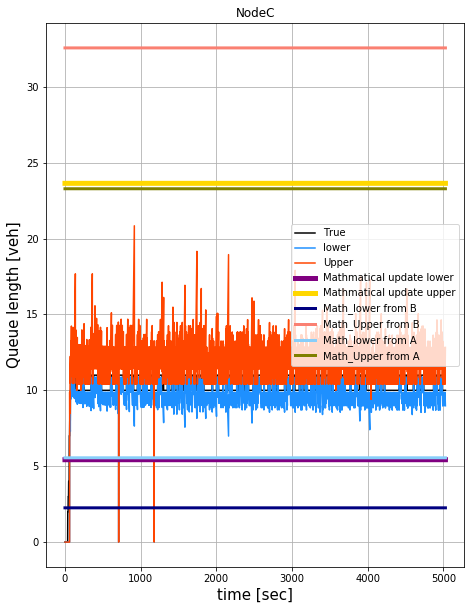

<Figure size 2000x2000 with 0 Axes>

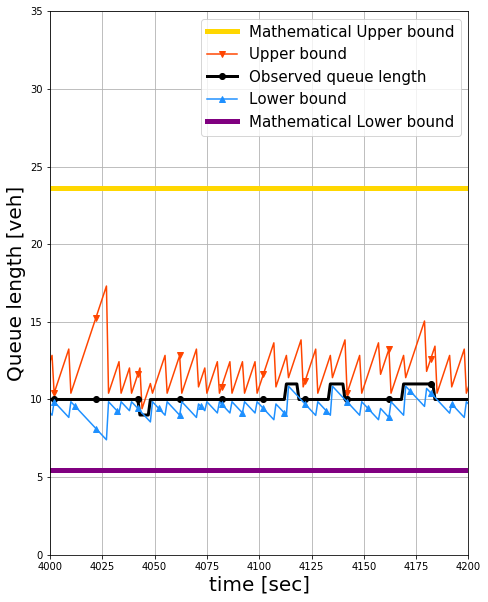

<Figure size 1000x1000 with 0 Axes>

In [83]:
# plt.plot(time, queue, label = "True", color=truecolor)
# plt.plot(time, AtoC_lead_st, label = "lower", color=lowcolor)
# plt.plot(time, AtoC_lead_ut, label = "Upper", color=uppcolor)
# plt.plot(time, Lower_NodeC_in_fromA, label = "Math_lower", color=mathlow, linewidth = linewid)
# plt.plot(time, Upper_NodeC_in_fromA, label = "Math_Upper", color=mathupp, linewidth = linewid)
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.grid()
# plt.legend()
# plt.title("NodeC (From A to C)")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()

# plt.plot(time, queue, label = "True", color=truecolor)
# plt.plot(time, AtoC_lead_st, label = "lower", color=lowcolor)
# plt.plot(time, AtoC_lead_ut, label = "Upper", color=uppcolor)
# plt.plot(time, Lower_NodeC_in_fromA, label = "Math_lower", color=mathlow, linewidth = linewid)
# plt.plot(time, Upper_NodeC_in_fromA, label = "Math_Upper", color=mathupp, linewidth = linewid)
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.xlim(4000, 4400)
# plt.grid()
# plt.legend()
# plt.title("NodeC (From A to C)")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()

# plt.plot(time, queue, label = "True", color=truecolor)
# plt.plot(time, BtoC_lead_st, label = "lower", color=lowcolor)
# plt.plot(time, BtoC_lead_ut, label = "Upper", color=uppcolor)
# plt.plot(time, Lower_NodeC_in_fromB, label = "Math_lower", color=mathlow, linewidth = linewid)
# plt.plot(time, Upper_NodeC_in_fromB, label = "Math_Upper", color=mathupp, linewidth = linewid)
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.grid()
# plt.legend()
# plt.title("NodeC (From B to C)")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()

# plt.plot(time, queue, label = "True", color=truecolor)
# plt.plot(time, BtoC_lead_st, label = "lower", color=lowcolor)
# plt.plot(time, BtoC_lead_ut, label = "Upper", color=uppcolor)
# plt.plot(time, Lower_NodeC_in_fromB, label = "Math_lower", color=mathlow, linewidth = linewid)
# plt.plot(time, Upper_NodeC_in_fromB, label = "Math_Upper", color=mathupp, linewidth = linewid)
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.xlim(4000, 4400)
# plt.grid()
# plt.legend()
# plt.title("NodeC (From B to C)")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()


# plt.plot(time, queue, label = "True", color=truecolor)
# plt.plot(time, AtoC_lead_st, label = "lower", color=lowcolor)
# plt.plot(time, AtoC_lead_ut, label = "Upper", color=uppcolor)
# plt.plot(time, Lower_NodeC, label = "Mathmatical update lower", color=mathlow, linewidth = linewid)
# plt.plot(time, Upper_NodeC, label = "Mathmatical update upper", color=mathupp, linewidth = linewid)
# plt.plot(time, Lower_NodeC_in_fromB, label = "Math_lower from B", color="navy", linewidth = 3)
# plt.plot(time, Upper_NodeC_in_fromB, label = "Math_Upper from B", color="salmon", linewidth = 3)
# plt.plot(time, Lower_NodeC_in_fromA, label = "Math_lower from A", color="lightskyblue", linewidth = 3)
# plt.plot(time, Upper_NodeC_in_fromA, label = "Math_Upper from A", color="olive", linewidth = 3)
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.grid()
# plt.legend()
# plt.title("NodeC")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()

plt.plot(time, queue, label = "True", color=truecolor)
plt.plot(time, CtoCright_lead_st, label = "lower", color=lowcolor)
plt.plot(time, CtoCright_lead_ut, label = "Upper", color=uppcolor)
plt.plot(time, Lower_NodeC, label = "Mathmatical update lower", color=mathlow, linewidth = linewid)
plt.plot(time, Upper_NodeC, label = "Mathmatical update upper", color=mathupp, linewidth = linewid)
plt.plot(time, Lower_NodeC_in_fromB, label = "Math_lower from B", color="navy", linewidth = 3)
plt.plot(time, Upper_NodeC_in_fromB, label = "Math_Upper from B", color="salmon", linewidth = 3)
plt.plot(time, Lower_NodeC_in_fromA, label = "Math_lower from A", color="lightskyblue", linewidth = 3)
plt.plot(time, Upper_NodeC_in_fromA, label = "Math_Upper from A", color="olive", linewidth = 3)
plt.xlabel("time [sec]", fontsize = 15)
plt.ylabel("Queue length [veh]",fontsize = 15)
plt.grid()
plt.legend()
plt.title("NodeC")
plt.figure(figsize=(10,10), dpi=200)
plt.show()

# plt.plot(time, Upper_NodeC, label = "Mathmatical Upper bound",color=mathupp, linewidth = linewid)
# plt.plot(time, CtoCright_lead_ut, label = "Upper bound", color=uppcolor,linestyle='solid', marker=utmark ,markevery = 20)
# plt.plot(time, queue, label = "Observed queue length", color=truecolor,linestyle='solid', marker=true_mark,markevery = 20)
# plt.plot(time, CtoCright_lead_st, label = "Lower bound", color=lowcolor,linestyle='solid', marker=stmark,markevery = 10)
# plt.plot(time, Lower_NodeC, label = "Mathmatical Lower bound",color=mathlow, linewidth = linewid)
# plt.xlabel("time [sec]", fontsize = 30)
# plt.ylabel("Queue length [veh]",fontsize = 30)
# plt.xlim(4000, 4400)
# plt.ylim(0, 35)
# plt.grid()
# plt.legend(fontsize = 20,loc='upper right')
# plt.title("NodeC")
# plt.figure(figsize=(10,10), dpi=100)
# plt.show()

plt.plot(time, Upper_NodeC, label = "Mathematical Upper bound",color=mathupp, linewidth = linewid)
plt.plot(time, CtoCright_lead_ut, label = "Upper bound", color=uppcolor,linestyle='solid', marker=utmark ,markevery = 20)
plt.plot(time, queue, label = "Observed queue length", color=truecolor,linestyle='solid', marker=true_mark,markevery = 20,linewidth=3)
plt.plot(time, CtoCright_lead_st, label = "Lower bound", color=lowcolor,linestyle='solid', marker=stmark,markevery = 10)
plt.plot(time, Lower_NodeC, label = "Mathematical Lower bound",color=mathlow, linewidth = linewid)
plt.xlabel("time [sec]", fontsize = 20)
plt.ylabel("Queue length [veh]",fontsize = 20)
plt.xlim(4000, 4200)
plt.ylim(0, 35)
plt.grid()
plt.legend(fontsize = 15,loc='upper right')
# plt.title("NodeC")
plt.figure(figsize=(10,10), dpi=100)
plt.show()


# plt.plot(time, queue, label = "True", color=truecolor)
# plt.plot(time, CtoCright_lead_st, label = "lower", color=lowcolor)
# plt.plot(time, CtoCright_lead_ut, label = "Upper", color=uppcolor)
# plt.plot(time, Lower_NodeC, label = "Mathmatical update lower", color=mathlow, linewidth = linewid)
# plt.plot(time, Upper_NodeC, label = "Mathmatical update upper", color=mathupp, linewidth = linewid)
# plt.plot(time, Lower_NodeC_in_fromB, label = "Math_lower from B", color="navy", linewidth = 3)
# plt.plot(time, Upper_NodeC_in_fromB, label = "Math_Upper from B", color="salmon", linewidth = 3)
# plt.plot(time, Lower_NodeC_in_fromA, label = "Math_lower from A", color="lightskyblue", linewidth = 3)
# plt.plot(time, Upper_NodeC_in_fromA, label = "Math_Upper from A", color="olive", linewidth = 3)
# plt.xlim(4000, 4400)
# plt.ylim(0, 30)
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.grid()
# plt.legend(fontsize = 12,loc='upper right')
# plt.title("NodeC")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()

# # plt.plot(time, queue, label = "True", color=truecolor)
# plt.plot(time, Lower_NodeC, label = "V2Vlower", color=truecolor)
# plt.plot(time, Upper_NodeC, label = "V2VUpper", color=truecolor)
# plt.plot(time, AtoC_lead_st, label = "lower", color=truecolor)
# plt.plot(time, AtoC_lead_ut, label = "Upper", color=truecolor)
# plt.xlabel("time [sec]", fontsize = 15)
# plt.ylabel("Queue length [veh]",fontsize = 15)
# plt.grid()
# plt.legend()
# plt.title("NodeC")
# plt.figure(figsize=(10,10), dpi=200)
# plt.show()

Text(0,0.5,'Probability')

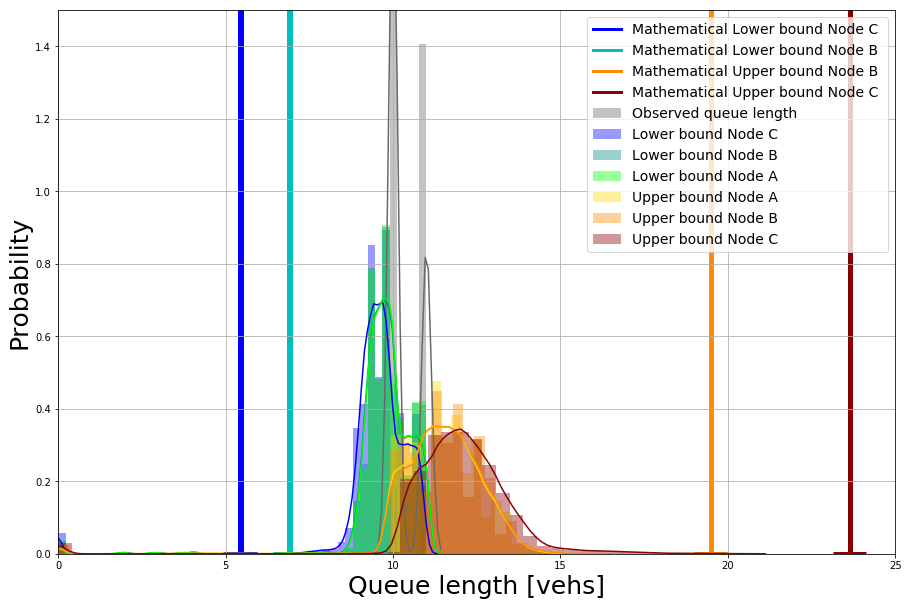

In [84]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
# sns.palplot(sns.color_palette("coolwarm", 7))
sns.distplot(queue, label = "Observed queue length", color = "dimgray")
# ax = sns.distplot(queue, rug=False, 
#                   kde_kws={ "lw": 2, "label": "KDE"},
#                   hist_kws={"histtype": "step", "linewidth": 1})


sns.distplot(CtoCright_last_st, label = "Lower bound Node C",color = "b")
sns.distplot(BtoC_last_st, label = "Lower bound Node B",color = "darkcyan")
sns.distplot(AtoC_last_st, label = "Lower bound Node A",color = "lime")


sns.distplot(AtoC_last_ut, label = "Upper bound Node A", color = "gold")
sns.distplot(BtoC_last_ut, label = "Upper bound Node B", color = "darkorange")
# sns.distplot(Lower_NodeB, label = "Mathmatical Lower bound Node B ")
# sns.distplot(Upper_NodeB, label = "Mathmatical Upper bound Node B ")
sns.distplot(CtoCright_last_ut, label = "Upper bound Node C", color = "darkred")
# sns.distplot(Lower_NodeB, label = "Mathmatical Lower bound Node C")
# sns.distplot(Upper_NodeB, label = "Mathmatical Upper bound Node C")
sns.distplot(Lower_NodeC, rug=False, kde_kws={"color": "b", "lw": 3, "label": "Mathematical Lower bound Node C "},
                  hist_kws={"histtype": "step", "linewidth": 5, "alpha": 1, "color": "b"})
sns.distplot(Lower_NodeB, rug=False, kde_kws={"color": "c", "lw": 3, "label": "Mathematical Lower bound Node B "},
                  hist_kws={"histtype": "step", "linewidth": 5, "alpha": 1, "color": "c"})
sns.distplot(Upper_NodeB, rug=False, kde_kws={"color": "darkorange", "lw": 3, "label": "Mathematical Upper bound Node B "},
                  hist_kws={"histtype": "step", "linewidth": 5, "alpha": 1, "color": "darkorange"})
sns.distplot(Upper_NodeC, rug=False, kde_kws={"color": "darkred", "lw": 3, "label": "Mathematical Upper bound Node C "},
                  hist_kws={"histtype": "step", "linewidth": 5, "alpha": 1, "color": "darkred"})


plt.grid()
plt.ylim(0,1.5)
plt.xlim(0,25)
plt.legend(fontsize = 14)
plt.xlabel("Queue length [vehs]", fontsize = 25)
plt.ylabel("Probability", fontsize = 25)

Text(0,0.5,'Probability')

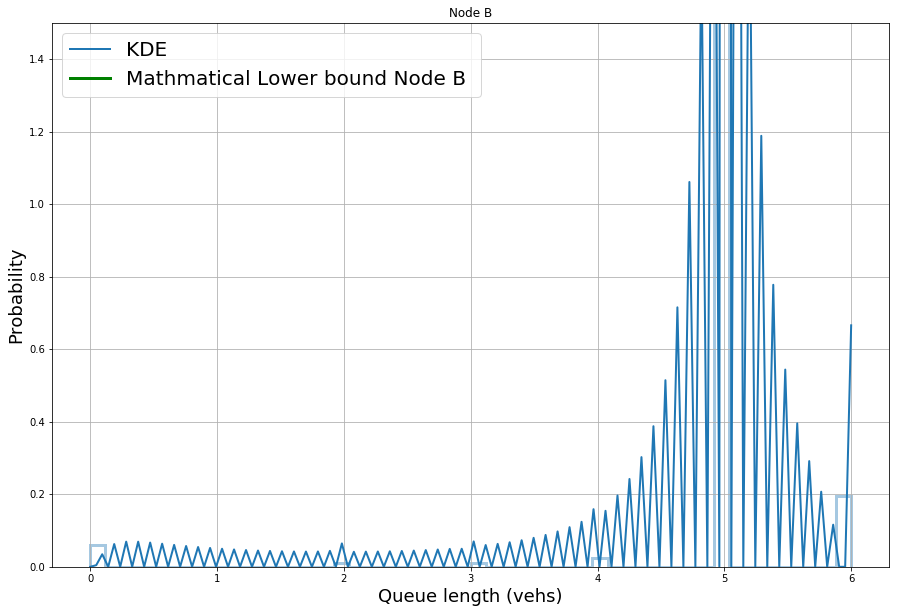

In [29]:
# ax = sns.distplot(queue, rug=False, rug_kws={"color": "g"}, 
#                   kde_kws={"color": "k", "lw": 2, "label": "KDE"},
#                   hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "b"})
ax = sns.distplot(queue, rug=False, 
                  kde_kws={ "lw": 2, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3})
ax = sns.distplot(Lower_NodeB,hist=False, rug=False, kde_kws={"color": "g", "lw": 3, "label": "Mathmatical Lower bound Node B "},
                  hist_kws={"histtype": "step", "linewidth": 5, "alpha": 1, "color": "g"})
plt.grid()
plt.ylim(0,1.5)
plt.title("Node B")
plt.legend(fontsize = 20)
plt.xlabel("Queue length (vehs)", fontsize = 18)
plt.ylabel("Probability", fontsize = 18)

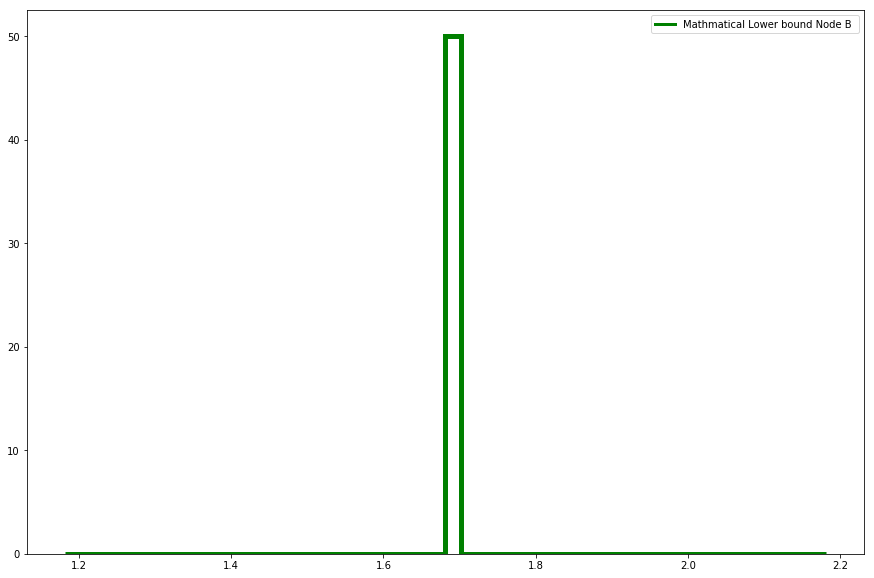

In [34]:
sns.distplot(Lower_NodeB,hist=True, rug=False, kde_kws={"color": "g", "lw": 3, "label": "Mathmatical Lower bound Node B "},
                  hist_kws={"histtype": "step", "linewidth": 5, "alpha": 1, "color": "g"})